# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras # Installing keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential # This is simply a linear stack of neural network layers, 
                                    # and it's perfect for the type of feed-forward CNN
from keras.layers import Dense, Dropout, Activation, Flatten, Add

# A dense layer is just a regular layer of neurons in a neural network. 
# Each neuron recieves input from all the neurons in the previous layer, thus densely connected. 
# The layer has a weight matrix W, a bias vector b, and the activations of previous layer a
# Dropout is a technique used to prevent a model from overfitting. 
# Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase

# keras.layers.Add() Layer that adds a list of inputs. 
# It takes as input a list of tensors, all of the same shape, and returns a single tensor (also of the same shape).

from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# load_data() downloads the mnist dataset and divides into training and test datasets
# X_train and y_train are the images and labels in train dataset
# X_test and y_test are the images and labels in test dataset

In [24]:
# Finding no. of images and height and width of each image 
print(X_train.shape)

(60000, 28, 28)


(60000, 28, 28)


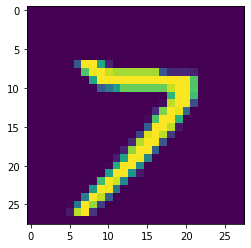

In [25]:
print (X_train.shape)
# Plotting the image present at 3423 index in the train dataset
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[3423])

In [0]:
# reshape is used to bring to a shape that can be consumed by the next layer
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Standardizing the values between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [28]:
# printing the labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# whereever the label is available it prints 1 at that place
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [30]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
from keras.layers import Activation
model = Sequential()

''' 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))
'''
# no. of labels in y train - it will give us 10 
num_labels = len(np.unique(y_train))

# First layer convolution with 32 kernels of size 3*3, input image is 28*28*1
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# Applying max pooling to redice the pixel size
model.add(MaxPooling2D(2))

# Second layer convolution with 32 kernels of size 3*3, input image is 26*26*32
model.add(Convolution2D(32,3,3, activation='relu'))
# Applying max pooling to redice the pixel size
model.add(MaxPooling2D(2))

#model.add(Convolution2D(32, 1, activation='relu'))
# Flattening the layer to get 1d vector
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(0.2))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [34]:
# Fitting the model on train data with epoch 10 
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.2094 - acc: 0.9362
Epoch 2/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0743 - acc: 0.9774
Epoch 3/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0568 - acc: 0.9821
Epoch 4/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0471 - acc: 0.9855
Epoch 5/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0403 - acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0358 - acc: 0.9888
Epoch 7/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0328 - acc: 0.9894
Epoch 8/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0297 - acc: 0.9904
Epoch 9/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0267 - acc: 0.9913
Epoch 10/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0247 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [36]:
print(score)

[0.03361517598268256, 0.9888]


In [0]:
y_pred = model.predict(X_test)

In [38]:
print(y_pred[:9])
print(y_test[:9])

[[1.02837250e-09 5.85027166e-12 4.39290460e-07 1.59685371e-07
  4.14951742e-15 3.55260994e-11 7.11770742e-21 9.99999404e-01
  9.35341561e-12 6.91781299e-09]
 [1.58143503e-05 2.82979872e-05 9.99946833e-01 3.44509254e-10
  1.12244346e-10 4.11317546e-13 8.98753024e-06 4.31393914e-11
  1.11866214e-07 1.37747919e-12]
 [5.56818236e-09 9.99959826e-01 2.21550067e-08 1.37154010e-09
  1.64583435e-05 8.09597722e-08 4.99631838e-08 2.34753352e-05
  9.21102696e-08 7.13436288e-09]
 [9.99999166e-01 9.52704288e-15 1.88665350e-08 1.11428471e-11
  7.12392478e-10 4.57972549e-09 8.12599581e-07 2.33148167e-10
  3.31701083e-10 1.58179658e-09]
 [8.39722042e-11 9.70725930e-12 3.79458243e-10 1.22218980e-13
  9.99999523e-01 3.90683014e-10 2.65910800e-11 7.08989312e-09
  2.78590956e-10 4.91885373e-07]
 [2.22154473e-08 9.99954820e-01 1.99636947e-08 1.10438041e-10
  4.05887567e-06 7.46930906e-10 3.22326477e-09 4.10985704e-05
  9.55086410e-09 1.12668985e-08]
 [9.71206876e-15 4.57791538e-09 1.40895731e-08 4.84411285e

In [39]:
# Printing the no. of layers available in network
layer_dict = dict([(layer.name, layer) for layer in model.layers])

print(type(layer_dict))
print(layer_dict.keys())

#layer_output = layer_dict['conv2d_1'].output

#print(type(layer_output))
#print(layer_output.shape[3])



<class 'dict'>
dict_keys(['conv2d_3', 'max_pooling2d_3', 'conv2d_4', 'max_pooling2d_4', 'flatten_2', 'dropout_2', 'dense_2', 'activation_2'])


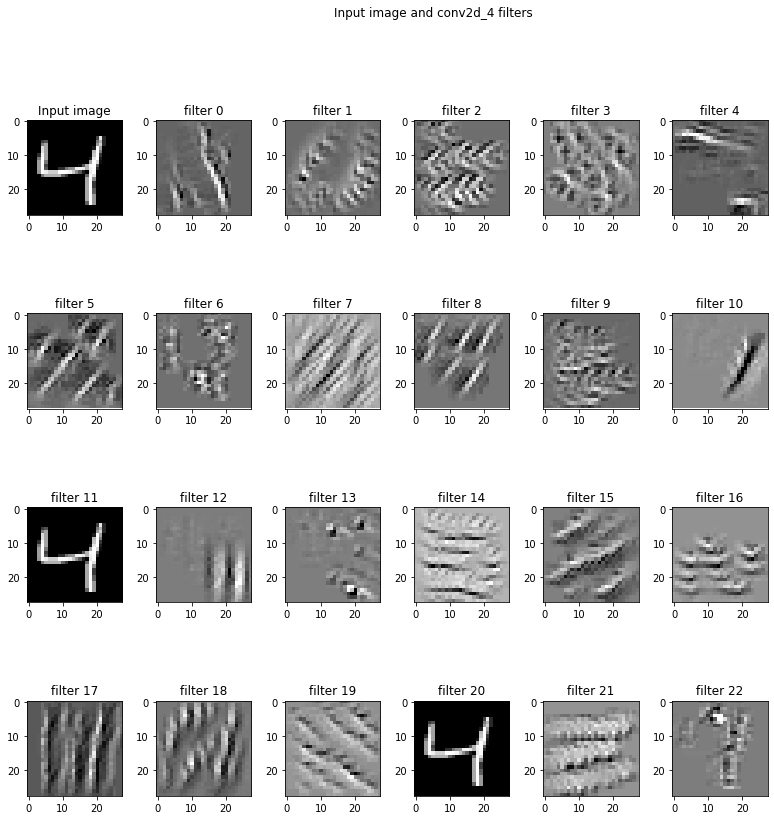

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()